<a href="https://colab.research.google.com/github/Tiblonde/pytorch-learning/blob/main/pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Tensor

## 1.1如何初始化一个张量

In [ ]:
import torch
import numpy as np

In [ ]:
data = [[1, 2],[3, 4]] # 1.直接从Data创建张量
x_data = torch.tensor(data)

In [ ]:
np_array = np.array(data) # 2.从numpy_array创建
x_np = torch.from_numpy(np_array)

In [ ]:
x_ones = torch.ones_like(x_data)  # 3.1 从张量创建将保留传入张量的属性，全1张量
print(f"ones Tensor: \n {x_ones} \n")
x_rand = torch.rand_like(x_data,dtype=torch.float)  # 3.2 让张量保留另一个张量的属性，随机张量
print(f"Random Tensor: \n {x_rand} \n")

ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9249, 0.2942],
        [0.6490, 0.4165]]) 



In [ ]:
shape = (2, 3, )  # 4.通过张量维度--形式上是元组--创建
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor} \n")

Random Tensor: 
 tensor([[0.4156, 0.0561, 0.5511],
        [0.6648, 0.2312, 0.1398]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



## 1.2 张量的属性（attributes）

In [ ]:
#tensor = torch.rand((3,4))
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor:{tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor:torch.float32
Device tensor is stored on: cpu


## 1.3 张量的（代数）运算


张量有超过1200种运算，包括算数、线性代数、矩阵运算等。


每种运算都可以在CPU或加速器上（CUDA、MPS、XPU等），Colab通过`代码执行程序>更改进行时类型>GPU`加速。


张量默认在CPU上创建，可以显式使用`.to`将张量移动到加速器上。跨设备复制张量会相当浪费时间

In [ ]:
# （当加速器可用时，将张量移动），这种写法不适用Colab（torch版本旧，需>=2.6.0）
if torch.accelerator.is_available():
  tensor = tensor.to(torch.accelerator.current_accelerator())

AttributeError: module 'torch' has no attribute 'accelerator'

In [ ]:
# （当加速器可用时，将张量移动）
if torch.cuda.is_available():
  cuda0 = torch.device('cuda:0')
  tensor = tensor.to(cuda0)
  print(f"Cuda is supported and device of tensor is:\n{tensor.device}\n")
else:
  print("Cuda is not supported.")


Cuda is supported and device of tensor is:
cuda:0



In [ ]:
# 标准张量索引和切片运算（类似numpy）
tensor = torch.ones(4, 4)
print(f"Device Tensor is stored on:{tensor.device}")

print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:, 1] = 0
print(tensor)


Device Tensor is stored on:cpu
First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
# 将张量按维度拼接
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [ ]:
# 数值运算 矩阵相乘的三种写法
# "tensor.T"返回张量的转置
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
print(y1,"\n",y2)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)
print(y3)


tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[0.9161, 0.2779, 0.7020, 0.2727],
        [0.8724, 0.8306, 0.3199, 0.2655],
        [0.1623, 0.4894, 0.2768, 0.7552],
        [0.7842, 0.1561, 0.5433, 0.6520]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [ ]:
# 单元素的张量可以用".item()"转为python数值
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [ ]:
# 将结果存储到操作数中操作称为就地操作，用`_`后缀表示
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## 1.4 和Numpy的联结

Tensors 在 CPU 上和 NumPy 数组可以共享其底层内存位置，改变一个会影响另一个

In [ ]:
t = torch.ones(5)
print(f"t:{t} \n datatype of t: {t.dtype}")
n = t.numpy()
print(f"n:{n} \n datatype of n: {n.dtype}")

t:tensor([1., 1., 1., 1., 1.]) 
 datatype of t: torch.float32
n:[1. 1. 1. 1. 1.] 
 datatype of n: float32


In [ ]:
# 对tensor的运算将影响numpy中的array
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [ ]:
# 从numpy创建的tensor，改变numpy也影响tensor
n = np.ones(5)
t = torch.from_numpy(n)

np.add(n,1,out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# 2.Datasets & DataLoaders

PyTorch 提供了两个数据操作单元：`torch.utils.data.DataLoader`和`torch.utils.data.Dataset`，允许您使用预加载的数据集以及自己的数据。`Dataset`存储样本及其对应的标签，而`DataLoader`将`Dataset`分批次打包，形成一种可迭代对象，以方便访问样本。


PyTorch领域库（像是图像领域、音频领域）提供了许多预加载的数据集（如 FashionMNIST），这些数据集继承自`torch.utils.data.Dataset`并实现了特定于数据的功能。它们可以用于**原型设计**和**模型基准测试**。您可以在以下位置找到它们：Image Datasets, Text Datasets, and Audio Datasets

## 2.1 加载数据集


使用TorchVision加载Fashion-MNIST数据集：


Fashion-MNIST是Zalando杂志的数字图片，包含60000个训练样本和10000个测试样本。每个样本包含28*28像素的灰度图像和1个标签（共10种标签）

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root = "data",  # 指定数据存放的位置
    train = True,  # 指定下载的是训练/测试数据集
    download = True,  # 如果数据不在root中，是否从网上下载
    transform = ToTensor() # 指定特征和标签transformation
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 13.1MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.85MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 12.4MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



数据集下载到Colab云端临时虚拟机文件系统中的一个路径。可在Colab左侧“文件”中查看和下载。

## 2.2 迭代和可视化数据集


可以手动将`Datasets`按照列表进行索引：`training_data[index]`。使用`matplotlib`来可视化。

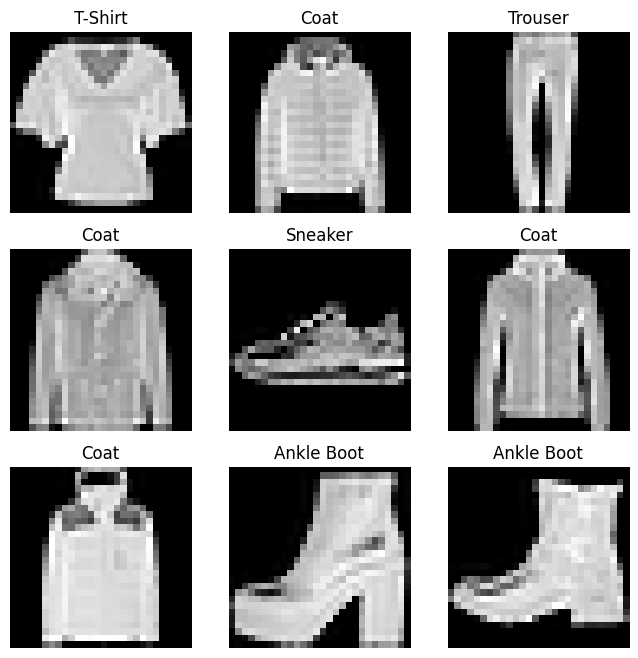

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item() # 选取索引
  img, label = training_data[sample_idx]  # 得到图片和索引tensor
  # matplotlib.pyplot
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 2.3 从自己的数据中创建自定义数据集


一个自定义数据集必需实现3个函数：`__init__`,`__len__`,`__getitem__`。FashionMNIST的图像存储在`img_dir`中，标签则存储在一个CSV文件中`annotation_file`

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  # __init__函数在初始化Dataset对象时会执行一次，将初始化包含图像的目录、标注文件、两种transform
  def __init__(self, annotations_file, img_dir, transform=None,
target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = target_transform
    self.target_transform = target_transform

  # __len__返回datasets中的样本数量
  def __len__(self):
    return len(self.img_labels)

  # __getitem__加载并返回给定索引idx处的一个样本：
    # 将其张量化torchvision.io.read_image，
    # 从self.img_labels中的CSV中读取标签，
    # 调用transform，返回图片张量和对应的元组标签
  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label


## 2.4 为使用Dataloaders训练准备好数据


`Dataset`每次从数据集中获取一个样本点，这个样本点包含了特征（像素）和标签。训练模型时，通常希望以"minibatches"传递样本，在每个epoch中重洗数据（reshuffle the data）来减少过拟合和利用python中的multiprocessing加速数据获取。

In [ ]:
# Dataloader是一个将上述特性抽象化的可迭代对象，形成了一个api

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


## 2.5 用Dataloader迭代
已经将数据集加载到DataLoader中了，并且可以根据需要遍历数据集。每轮迭代返回一批`train_features`和`train_labels`（批的大小为64）。由于`shuffle=true`，在完全迭代后数据会被打乱。

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
Train_feature[0] shape: torch.Size([1, 28, 28])
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


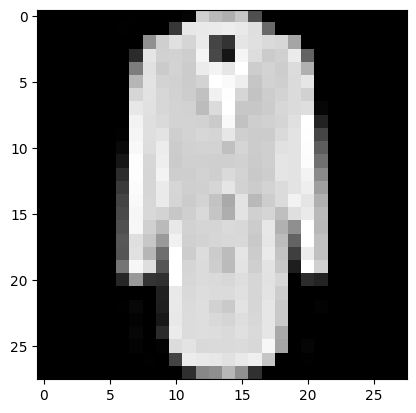

Label: 4


In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

print(f"Train_feature[0] shape: {train_features[0].size()}")
print(torch.ones((2,3,3)))
print(torch.ones((1,3,3)).squeeze())

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img,cmap="gray")
plt.show()
print(f"Label: {label}")

# 3.Transform

数据并不总是以训练机器学习算法所需的最终处理形式出现。我们使用***转换（transform）***来对数据进行一些操作，使其适合训练。

所有Torchvision datasets有两个参数-`transform`用于修改特征，`target_transform`用于修改标签-这些标签接受含有转换逻辑的可调用对象（transfrom = function()）。torchvision.transform模块提供了若干开箱即用的transforms。


FashionMNIST的***特征***是PIL图像格式，***标签***都是整数。用于训练时，需要将特征作为归一化张量，标签作为one-hot编码的张量。为了这些转化，使用到`ToTensor`和`Lambda`

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    download=True,
    train=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y:torch.zeros(10,
dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 14.2MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 229kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 4.32MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 8.70MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## 3.1 ToTensor()


`ToTensor()`将PIL图片或Numpy数组`narray`转换为`floatTensor`，并将像素值缩放到[0.,1.]中以归一化。



## 3.2 Lambda Transforms


Lambda变换应用于任何用户定义的lambda函数-这个函数将整数转换为one-hot编码的张量：它首先创建一个大小为10（我们数据集中标签的数量）的零张量，并调用scatter_将value=1值分配给由标签y给出的索引。


（这意味着，把2转为类似transpose([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])的结构。）

In [ ]:
target_transform=Lambda(lambda y: torch.zeros(10,
dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

In [ ]:
# 上述标签每次传入一个整数，
index = torch.tensor([4])
torch.zeros(10,dtype=torch.float).scatter(dim=0,index=index, value=1)

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

# 4.Build the Neural Network


神经网络由执行数据操作的层/模块组成。`torch.nn`命名空间提供了构建您自己的神经网络所需的所有构建块。PyTorch中的每个模块都继承自`nn.Module`。一个神经网络本身是一个模块，由其他模块（层）组成。这种嵌套结构使得构建和管理复杂的架构变得容易。




下面构建一个神经网络对FashionMNIST进行分类：

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## 4.1 获取硬件以支持训练




In [ ]:
device = torch.device('cuda:0').type if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


## 4.2 定义类


通过子类化`nn.Module`来定义神经网络，并在`__init__`中初始化神经网络层。每个`nn.Module`子类都实现了`forward`方法中的输入数据操作。

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512,10)
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

实例化一个`model`并显式迁移到device上：

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


将输入数据传入模型就是使用模型。这执行了模型的前向反馈，以及一些background operations。杜绝直接调用`model.forward()`


调用模型会对输入处理并返回一个二维张量，dim=0对应每个类别的原始预测值，dim=1对应每个输出的单独值。



In [ ]:
X = torch.rand(1,28,28, device=device)
logits = model(X)
print(f"Predicted logits: {logits}")
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted logits: tensor([[ 0.0037, -0.0436, -0.0344, -0.0706,  0.0180, -0.0665, -0.1340, -0.1005,
          0.0195, -0.1003]], grad_fn=<AddmmBackward0>)
Predicted class: tensor([8])


## 4.3 模型的层模块


将FashionMNIST模型按层拆解。为了说明，将使用一个包含3张28*28的小批次图像，并看看这些图像传递给网络时发生了什么：


torch.Size([3, 28, 28])


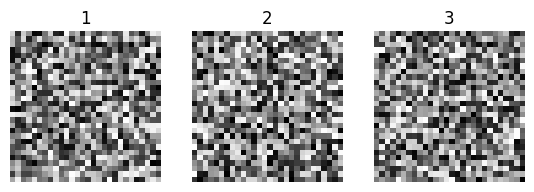

In [ ]:
import matplotlib.pyplot as plt

input_image = torch.rand(3,28,28)

# matlibplot 可视化
figure = plt.figure(figsize=(9,9))
for i in range(1,4):
  img = input_image[i-1, :]

  figure.add_subplot(4,4,i)
  plt.title(f"{i}")
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")


print(input_image.size())

### 4.3.1 nn.Flatten


创建一个`nn.Flatten`将每个2D 28*28 图像转变为连续的784像素值，而batch_size（张量的第一个维度保持不变）：


In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)

print(flat_image.size())

torch.Size([3, 784])


### 4.3.2 nn.Linear


`nn.Linear`利用它存储的权重和偏置，对输入实施线性变换：


In [ ]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)

print(hidden1.size())

torch.Size([3, 20])


### 4.3.3 nn.ReLU


非线性激活函数是模型可以映射输入和输出复杂关系的原因。此类层在线性变换之后引入非线性。


在本模型中，线性层之间使用了`nn.ReLU`（也有其他激活函数）

In [ ]:
print(f"Only show one of the batch: ")
print(f"Before ReLU: {hidden1[0,:]}")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1[0,:]}")

Only show one of the batch: 
Before ReLU: tensor([-0.4636, -0.2401, -0.5011,  0.0913, -0.0328,  0.0692,  0.3409, -0.3499,
         0.4479,  0.4270,  0.5184,  0.0575,  0.1411,  0.0650, -0.0466, -0.0259,
         0.1589,  0.1520, -0.4966, -0.0796], grad_fn=<SliceBackward0>)
After ReLU: tensor([0.0000, 0.0000, 0.0000, 0.0913, 0.0000, 0.0692, 0.3409, 0.0000, 0.4479,
        0.4270, 0.5184, 0.0575, 0.1411, 0.0650, 0.0000, 0.0000, 0.1589, 0.1520,
        0.0000, 0.0000], grad_fn=<SliceBackward0>)


### 4.3.4 nn.Sequential


`nn.Sequential`是一个按序包含模块的容器。数据按照定义的顺序通过所有模块。

In [ ]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20,10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

print(logits.size())

torch.Size([3, 10])


### 4.3.5 nn.Softmax


神经网络的最后一层线性层返回 logits——一个在[-∞, ∞]范围内的原始值——这些值随后传递给 nn.Softmax 模块。logits 被缩放到[0, 1]范围内的值，表示模型对每个类别的预测概率。 dim 参数表示值必须沿其求和为 1 的维度。

In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

print(pred_probab[0,:])

tensor([0.1166, 0.0976, 0.0998, 0.1145, 0.1042, 0.0876, 0.1071, 0.0833, 0.1028,
        0.0864], grad_fn=<SliceBackward0>)


## 4.4 模型参数


神经网络中很多内部层是参数化的，即参数会在训练中被优化。通过子类化`nn.Module`，会自动跟踪模型内部所有字段，使用`parameters()`或`named_parameters()`方法访问。

In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
  print(f"Layer:{name}|Size:{param.size()}|Values:{param[:2]}\n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer:linear_relu_stack.0.weight|Size:torch.Size([512, 784])|Values:tensor([[ 0.0039, -0.0357,  0.0261,  ..., -0.0194, -0.0105,  0.0353],
        [-0.0334, -0.0093,  0.0067,  ..., -0.0321,  0.0342,  0.0151]],
       grad_fn=<SliceBackward0>)

Layer:linear_relu_stack.0.bias|Size:torch.Size([512])|Values:tensor([-0.0205, -0.0202], grad_fn=<SliceBackward0>)

Layer:linear_relu_stack.2.weight|Size:torch.Size([512, 512])|Values:tensor([[ 0.0082, -0.0190,  0.0026,  ..., -0.0421, -0.0107,  0.0291],
        [-0.0218,  0.0015,  0.0062,  ..., -0.0370, -0.0188,  0.0433]],
       grad_fn=<SliceBackward0>)

Layer:linear_relu_stack.2.bias|Size:torch.Size([512])|Values:

# 5.Automatic Differentiation with `torch.autograd`


在训练神经网络时，使用最频繁的算法是 **反向传播** 。在该算法中，参数（模型权重）会根据给定参数相对于损失函数的 **梯度** 进行调整。


为了计算这些梯度，PyTorch有一个内置的求导引擎`torch.autograd`。它支持任意计算图的自动梯度计算。


考虑最简单的单层神经网络，输入为 x ，参数为 w 和 b ，以及某种损失函数。它可以用以下方式在 PyTorch 中定义

In [ ]:
import torch

x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

## 5.1 张量、方程和计算图


在上面这个计算图中，w和b是需要优化的参数。因此需要计算这些参数在损失函数中的梯度。为此，将这些张量设置了`requires_grad`属性。


（或者可以在使用时用`x.requires_grad_(True)`方法）


应用到张量上的用于构建计算图的函数实际上是Function class 的对象。这个对象知道如何在前向传播时计算函数，也知道如何在反向传播时计算其导数。张量的 `grad_fn` 属性中存储了反向传播函数的引用。

In [ ]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7828764a5870>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x782876e57df0>


## 5.2 计算梯度


为了优化神经网络中的参数权重，我们需要计算损失函数关于参数的导数，即在某些固定值的 x 和 y 下，我们需要 $\frac{∂ loss}{∂w}$ 和 $\frac{∂ loss}{∂b}$。为了计算这些导数，我们调用 loss.backward() ，然后从 `w.grad` 和 `b.grad` 中获取值：

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0507, 0.0094, 0.0478],
        [0.0507, 0.0094, 0.0478],
        [0.0507, 0.0094, 0.0478],
        [0.0507, 0.0094, 0.0478],
        [0.0507, 0.0094, 0.0478]])
tensor([0.0507, 0.0094, 0.0478])


## 5.3 禁用梯度跟踪


默认情况下，所有带有 requires_grad=True 的张量都会跟踪其计算历史并支持梯度计算。然而，有些情况下我们不需要这样做，例如当我们训练好模型只想将其应用于某些输入数据时，即我们只想在网络中进行前向计算。我们可以通过将计算代码包围在 torch.no_grad() 块中来停止跟踪计算：

In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
  z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [ ]:
# 另一种使用detach()的策略
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


以下是需要禁用梯度跟踪的情况：
+ 将神经网络中的某些参数冻结
+ 只做前向传播，需要加速计算时。

## 5.4 关于计算图的更多


概念上，autograd 会记录所有数据（张量）和执行的操作（以及由此产生的新张量）在一个有向无环图（DAG）中，该图由 Function 对象组成。在这个 DAG 中，叶子节点是输入张量，根节点是输出张量。通过从根节点追踪到叶子节点，可以使用链式法则自动计算梯度。

# 6.Optimizing Model Parameters

In [6]:
import torch

from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

from torch.utils.data import DataLoader

training_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

from torch import nn

class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(28*28, 512),
      nn.ReLU(),
      nn.Linear(512,512),
      nn.ReLU(),
      nn.Linear(512,10)
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = NeuralNetwork()




## 6.2 超参数


超参数可以控制模型优化过程，影响模型训练和收敛速度：
+ NUmber of Epochs：迭代次数
+ Batch Size：
+ Learning rate

In [7]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

## 6.3 优化循环


设置好超参数后，就可以使用optimization loop进行模型训练了，一个循环的每次迭代称为 epoch

## 6.4 损失函数

In [ ]:
loss_fn = nn.CrossEntropyLoss()

## 6.5 优化器



Stochastic Gradient Descent (SGD)


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## 6,6 综合

In [12]:
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  # 将模型设置为train模式，对batch normalization 和 dropout layer 很重要。
  model.train()
  for batch, (X, y) in enumerate(dataloader):
    pred = model(X)
    loss = loss_fn(pred,y)

    #反向传播
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * batch_size + len(X)
      print(f"loss:{loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
  #将模型设置为evaluation模式
  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  #使用torch.no_grad()评估模型，这样就不会在测试时去计算梯度了
  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy:{(100*correct):>0.1f}%, Avg loss:{test_loss:>8f}\n")

在初始化损失函数和优化器后，将它传入train_loop和test_loop：

In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 20
for t in range(epochs):
  print(f"Epoch {t+1}\n-----------------------------------------")
  train_loop(training_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-----------------------------------------
loss:2.124749 [   64/60000]
loss:2.141955 [ 6464/60000]
loss:2.118830 [12864/60000]
loss:2.113176 [19264/60000]
loss:2.048773 [25664/60000]
loss:2.010081 [32064/60000]
loss:2.002404 [38464/60000]
loss:1.961066 [44864/60000]
loss:1.943437 [51264/60000]
loss:1.882723 [57664/60000]
Test Error: 
 Accuracy:56.4%, Avg loss:1.905674

Epoch 2
-----------------------------------------
loss:1.858070 [   64/60000]
loss:1.921638 [ 6464/60000]
loss:1.824083 [12864/60000]
loss:1.703490 [19264/60000]
loss:1.727073 [25664/60000]
loss:1.735632 [32064/60000]
loss:1.660010 [38464/60000]
loss:1.647122 [44864/60000]
loss:1.614782 [51264/60000]
loss:1.585675 [57664/60000]
Test Error: 
 Accuracy:60.8%, Avg loss:1.538354

Epoch 3
-----------------------------------------
loss:1.533706 [   64/60000]
loss:1.540708 [ 6464/60000]
loss:1.524437 [12864/60000]
loss:1.440670 [19264/60000]
loss:1.388079 [25664/60000]
loss:1.404597 [32064/60000]
loss:1.352567 [38464/600